<a href="https://colab.research.google.com/github/kaushikykk/scaler/blob/main/pandaspractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()
data_mc = pd.read_csv('mckinsey.csv') ## will read a data frame and store in df.
data_mc.head()

Saving mckinsey.csv to mckinsey (2).csv


,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


- In the above DataFrame the Country, year, population and continent life_exp are column headers and numbers on left are INDEXES(used for indexing and slicing)

- values that are stored are called Datapoints( we need row Index and column Index value to get Datapoints)

- To get name of column - we use the name and call it df['score'] - this will return series. SO a single column is called series. and will have row Index and no column Index
- If I want to access an element in a series or single column - then it is
df['series name'][index value] i.e df['country'][1]


In [ ]:
## series is a one-dimensional array.
## DataFrame is a 2D array.
df['country'][1] ##If I want to access an element in a series or single column - then it is df['series name'][index value] i.e df['country'][1]

'Afghanistan'

In [ ]:
type(df['country'])

pandas.core.series.Series

In [ ]:
df.shape ## rows 1704 and columns 6

(1704, 6)

In [ ]:
df['country'][:5] ## we can do directly slicing

KeyError: 'country'

## Just like CSV, A parquet files are also holding dataFrame and uses of it are

Databases:

Tools like Apache Hive or Spark can query Parquet files directly.
Why Use Parquet?
*Efficient Storage: Columnar storage allows better compression and less disk I/O.
*Optimized Queries: Great for analytics where you only query a subset of columns.
*Schema Evolution: Supports schema evolution, meaning you can add/remove columns without breaking the format.
*Compatibility: Widely used in data pipelines with frameworks like Hadoop, Spark, and cloud tools like AWS Glue.


In [ ]:
import pandas as pd

# Create a sample DataFrame
data = {
    "Name": ["Alice", "Bob", "Charlie"],
    "Age": [25, 30, 35],
    "City": ["New York", "Los Angeles", "Chicago"]
}
df = pd.DataFrame(data)

# Save DataFrame as a Parquet file
df.to_parquet("example.parquet", engine="pyarrow", index=False)
print("Parquet file created: example.parquet")


Parquet file created: example.parquet


In [ ]:
# Read the Parquet file
df_read = pd.read_parquet("example.parquet", engine="pyarrow")

# Display the DataFrame
print("Contents of the Parquet file:")
print(df_read)


Contents of the Parquet file:
      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago


In [ ]:
import pandas as pd
import numpy as np

# Create a large DataFrame with random data
num_rows = 100_000
data = {
    "Name": np.random.choice(["Alice", "Bob", "Charlie", "David"], size=num_rows),
    "Age": np.random.randint(18, 60, size=num_rows),
    "City": np.random.choice(["New York", "Los Angeles", "Chicago", "Houston"], size=num_rows),
    "Salary": np.random.randint(40_000, 120_000, size=num_rows)
}
large_df = pd.DataFrame(data)

# Preview the data
print(large_df.head())

# Save the large DataFrame to a Parquet file
large_df.to_parquet("large_dataset.parquet", engine="pyarrow", compression="snappy", index=False)
print("Parquet file with large dataset created: large_dataset.parquet")


      Name  Age      City  Salary
0  Charlie   51  New York   57705
1    Alice   34  New York  102010
2    Alice   47   Chicago   70449
3    Alice   53  New York   76631
4  Charlie   34   Chicago  116636
Parquet file with large dataset created: large_dataset.parquet


In [ ]:
# Save Parquet file with GZIP compression
large_df.to_parquet("compressed_dataset.parquet", engine="pyarrow", compression="gzip", index=False)
print("Compressed Parquet file created: compressed_dataset.parquet")


Compressed Parquet file created: compressed_dataset.parquet


In [ ]:
# Save Parquet file with partitioning
large_df.to_parquet(
    "partitioned_dataset",
    engine="pyarrow",
    compression="snappy",
    index=False,
    partition_cols=["City"]  # Partition by the 'City' column
)
print("Partitioned Parquet files created in folder: partitioned_dataset")


Partitioned Parquet files created in folder: partitioned_dataset


In [ ]:
# Read the entire partitioned dataset
partitioned_df = pd.read_parquet("partitioned_dataset", engine="pyarrow")
print(partitioned_df.head())

# Filter specific partitions (e.g., only 'City=Chicago')
filtered_df = pd.read_parquet("partitioned_dataset/City=Chicago", engine="pyarrow")
print(filtered_df.head())


      Name  Age  Salary     City
0    Alice   47   70449  Chicago
1  Charlie   34  116636  Chicago
2    Alice   28  107864  Chicago
3    David   44   57831  Chicago
4  Charlie   59   40150  Chicago
      Name  Age  Salary
0    Alice   47   70449
1  Charlie   34  116636
2    Alice   28  107864
3    David   44   57831
4  Charlie   59   40150


DataFrame - is a collection of more than one series
SYNTAX - df['country','year'] -- this is a dataframe

In [ ]:
df['country']

KeyError: 'country'

In [ ]:
### if you want series as a DataFrame use double square brackets

df[['country']] ## is now a DataFrame

In [ ]:
df['country']

In [ ]:
df['year']

In [ ]:
df.info()

Create DataFrame from scratch

In [ ]:
dict_users = {"userid": [1,2,3],
              "name":["sharadh","shahii","mahi"]}  ### length of elements should match

type(dict_users)


In [ ]:
pd.DataFrame(dict_users) ## convert dictionary to DataFrame.

Basic Ops - Add a new column
- Delete columns
- Rename columns
- Add new columns


In [ ]:
df.columns

Index(['Name', 'Age', 'City'], dtype='object')

In [ ]:
df.keys()

Index(['Name', 'Age', 'City'], dtype='object')

In [ ]:
df[['country']] ## single series can become a DataFrame

KeyError: "None of [Index(['country'], dtype='object')] are in the [columns]"

In [ ]:
## Syntax to get unique values in series
## Unique on DataFrame does not work and works on series only
df['country'].unique()

KeyError: 'country'

In [ ]:
## count of unique values
len(df['country'].unique())


KeyError: 'country'

In [ ]:
## Another method to find the count of unique values
df['country'].nunique()

KeyError: 'country'

In [ ]:
## value_counts will give unique values and also total number of times it is repeating
df['country'].value_counts() ## this values is in descending order.

In [ ]:
## rename a column
df.rename(columns={'country':'Country'})

In [ ]:
dict1={'country':'Country','year':'Year'}   ##Telling pandas that their  old name is to be changed to new name.

In [ ]:
df.rename(columns=dict1) ## different ways for renaming

In [ ]:
df.rename(dict1, axis=1) ## different ways for renaming column header axis =1 is for headers

In [ ]:
##df.rename(dict1, axis=0) ## different ways for renaming row header axis =0 is for rows Index

In [ ]:
## Add new column
# use existing column to create new column
# new column from new data
df['year'] = df['year']-1000


In [ ]:
df['year+10'] = df['year']+10 ## adding new column and asignning a new name for the column as df['year+10']
df

In [ ]:
df['new_column'] = df['year']+df['population'] ## using exisiting columns we created another column
df

In [ ]:
df.drop('year+10', axis=1) ## drop a column


In [ ]:
## syntax to permanently delete the year+10 column. This will change Dataframe permanently
df.drop('year+10', axis=1, inplace=True)
df

In [ ]:
df2 = df.drop('new_column', axis=1) ## drop a column
df2

In [ ]:
df

In [ ]:
df2 ## we can copy changes to a new df rather than working on original DF.

In [ ]:
## overwrite a new_column from scratch. Length of values (1) does not match length of index (1704)

list1 = ['Sachin']
df["User"] = list1
df

In [ ]:
new_list = ["ykk" for i in range(df.shape[0])] ## we can creaate it using the list
df['member'] = new_list
df.head()

In [ ]:
## overwrite the column
new_list = [f"ykk {i}" for i in range(df.shape[0])] ## we can create it using the list
df['member'] = new_list
df.head()

In [ ]:
df['year']+df['population'] ## element wise operation

Basic operations on Row Indexes



In [ ]:
df.index = [i + 100 for i in range(df.shape[0])]
df.head()

In [ ]:
df.loc[104] ## row lookup

## Implicit and Explicit Indexes
Implicit - that is default python
Explicit is user provided

In [ ]:
df.iloc[100] ## implicit index

In [ ]:
demo = pd.Series([1,2,3,4,5], index=['a','b','c','d','e'])
demo
demo

In [ ]:
df = df.set_index(["year"]) ## set country as index

In [ ]:

df

In [ ]:
df.set_index(["new_column", "population"])

In [ ]:
df.reset_index()

In [ ]:
df3 = df.loc[101:104],['population','continent']
df3

(Empty DataFrame
 Columns: [Name, Age, Percentage, Stream]
 Index: [],
 ['population', 'continent'])

In [ ]:
gf= df.loc[101:104,['population','continent']]

In [ ]:
df.reset_index(inplace=True)
df

In [ ]:
df.drop('index', axis=1, inplace=True)
df

In [ ]:
df_new = df.loc[101:104,['population','continent']]
df_new

In [ ]:
df_latest = df.iloc[0:10,1:4]
df_latest

In [ ]:
df_min = df.iloc[0:10,0:4]
df_min

In [ ]:
new_index = ["ID1", "ID2", "ID3"]
df_min = new_index
df_min

In [ ]:
df_min = df.iloc[0:10,0:4]
df_min

In [ ]:
df_min = df.iloc[0:10,0:4]
df_min

,Name,Age,City
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,35,Chicago


In [ ]:
df.set_index(['year','population'])
df

In [ ]:
df_g = df.set_index(["year","population"])
df_g

In [ ]:

df_g

In [ ]:
df_g
df_g.columns
df_g.index.names = ['Decade','people']
df_g

NameError: name 'df_g' is not defined

In [ ]:
# Set 'Name' as the index
df.set_index("year", inplace=True)

# Rename the index
df.index.name = "Person"

print(df)


KeyError: "None of ['year'] are in the columns"

In [ ]:
df = pd.DataFrame([1, "Ram", "IT"],
                  columns = ["emp_id", "name", "dept"])

ValueError: Shape of passed values is (3, 1), indices imply (3, 3)

In [ ]:
df = pd.DataFrame([[1, 2], ["Ram", "Shyam"], ["IT", "Ops"]], columns = ["emp_id", "name", "dept"])

In [ ]:
df = pd.DataFrame({'emp_id':[1, 2], 'name': ['Ram', 'Shyam'], 'dept':['IT', 'Ops']})
df

In [ ]:
df = pd.DataFrame([[1, "Ram", "IT"], [2, "Shyam", "Ops"]], columns = ["emp_id", "name", "dept"])

In [ ]:
df = pd.DataFrame([[1, "Ram", "IT"]], columns = ["emp_id", "name", "dept"])

In [ ]:
data


{'Name': array(['Charlie', 'Alice', 'Alice', ..., 'David', 'David', 'Bob'],
       dtype='<U7'),
 'Age': array([51, 34, 47, ..., 38, 21, 55]),
 'City': array(['New York', 'New York', 'Chicago', ..., 'Houston', 'Chicago',
        'Houston'], dtype='<U11'),
 'Salary': array([ 57705, 102010,  70449, ...,  53176,  56562, 102035])}

In [ ]:
df

,Name,Age,City
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,35,Chicago


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False


In [ ]:
sum(data_mc.duplicated())

4

In [ ]:
data_mc(data_mc.duplicated())

TypeError: 'DataFrame' object is not callable

In [ ]:
columns2 = {'country':'Vietnam', 'year': "2024", 'population': "120000", 'continent': "Asia", 'life_exp': "67"}

In [ ]:
columns = {'country':'India', 'year': "2050", 'population': "2000000", 'continent': "Asia", 'life_exp': "120"}

In [ ]:
data_mc.loc(shape[0]) = columns

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (<ipython-input-62-8111033ad6d9>, line 1)

In [ ]:
data_mc.loc[1707] = columns

In [ ]:
data_mc.loc[4] = columns2

In [ ]:
data_mc.drop(2, inplace=True)

In [ ]:
data_mc.iloc[1700]= columns2

In [ ]:
data_mc.loc[1701]= columns2

In [ ]:
data_mc.loc[df.duplicated()]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
data_mc.set_index(['population', 'continent'])

TypeError: 'list' object is not callable

In [ ]:
data_mc.reset_index()

NameError: name 'data_mc' is not defined

In [ ]:
data_mc.drop(data_mc.index)

,country,year,population,continent,life_exp,gdp_cap


In [ ]:
data_mc

,country,year,population,continent,life_exp,gdp_cap
100,Afghanistan,1952,8425333,Asia,28.801,779.445314
101,Afghanistan,1957,9240934,Asia,30.332,820.853030
102,Afghanistan,1967,11537966,Asia,34.02,836.197138
103,Afghanistan,1977,14880372,Asia,38.438,786.113360
104,Afghanistan,1982,12881816,Asia,39.854,978.011439
...,...,...,...,...,...,...
1801,Zimbabwe,2007,12311143,Africa,43.487,469.709298
1802,India,2050,2000000,Asia,120,NaN
1803,Vietnam,2024,120000,Asia,67,NaN
1804,India,2050,2000000,Asia,120,NaN


In [ ]:
data_mc.reset_index()

,index,country,year,population,continent,life_exp,gdp_cap
0,100,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,101,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,102,Afghanistan,1967,11537966,Asia,34.02,836.197138
3,103,Afghanistan,1977,14880372,Asia,38.438,786.113360
4,104,Afghanistan,1982,12881816,Asia,39.854,978.011439
...,...,...,...,...,...,...,...
1701,1801,Zimbabwe,2007,12311143,Africa,43.487,469.709298
1702,1802,India,2050,2000000,Asia,120,NaN
1703,1803,Vietnam,2024,120000,Asia,67,NaN
1704,1804,India,2050,2000000,Asia,120,NaN


In [ ]:

data_mc.index = [i + 100 for i in range(data_mc.shape[0])]

data_mc

,country,year,population,continent,life_exp,gdp_cap
100,Afghanistan,1952,8425333,Asia,28.801,779.445314
101,Afghanistan,1957,9240934,Asia,30.332,820.853030
102,Afghanistan,1967,11537966,Asia,34.02,836.197138
103,Afghanistan,1977,14880372,Asia,38.438,786.113360
104,Afghanistan,1982,12881816,Asia,39.854,978.011439
...,...,...,...,...,...,...
1801,Zimbabwe,2007,12311143,Africa,43.487,469.709298
1802,India,2050,2000000,Asia,120,NaN
1803,Vietnam,2024,120000,Asia,67,NaN
1804,India,2050,2000000,Asia,120,NaN


In [ ]:
data_mc.rename(columns={'country':'DESH', 'life_exp':'range'})

,DESH,year,population,continent,range,gdp_cap
100,Afghanistan,1952,8425333,Asia,28.801,779.445314
101,Afghanistan,1957,9240934,Asia,30.332,820.853030
102,Afghanistan,1967,11537966,Asia,34.02,836.197138
103,Afghanistan,1977,14880372,Asia,38.438,786.113360
104,Afghanistan,1982,12881816,Asia,39.854,978.011439
...,...,...,...,...,...,...
1801,Zimbabwe,2007,12311143,Africa,43.487,469.709298
1802,India,2050,2000000,Asia,120,NaN
1803,Vietnam,2024,120000,Asia,67,NaN
1804,India,2050,2000000,Asia,120,NaN


In [ ]:
data_mc.set_index = ['DESHAM']

In [ ]:
data_mc.set_index = ['life_exp']
data_mc

,country,year,population,continent,life_exp,gdp_cap
100,Afghanistan,1952,8425333,Asia,28.801,779.445314
101,Afghanistan,1957,9240934,Asia,30.332,820.853030
102,Afghanistan,1967,11537966,Asia,34.02,836.197138
103,Afghanistan,1977,14880372,Asia,38.438,786.113360
104,Afghanistan,1982,12881816,Asia,39.854,978.011439
...,...,...,...,...,...,...
1801,Zimbabwe,2007,12311143,Africa,43.487,469.709298
1802,India,2050,2000000,Asia,120,NaN
1803,Vietnam,2024,120000,Asia,67,NaN
1804,India,2050,2000000,Asia,120,NaN


In [ ]:
d1 = data_mc.set_index('life_exp')
d1

TypeError: 'list' object is not callable

In [ ]:
data_mc.set_index('life_exp')
data_mc

TypeError: 'list' object is not callable

In [ ]:
data_mc.set_index('life_exp')
data_mc

TypeError: 'list' object is not callable

In [ ]:
data_mc.loc[data_mc.duplicated()]

,country,year,population,continent,life_exp,gdp_cap
1800,Vietnam,2024,120000,Asia,67,NaN
1803,Vietnam,2024,120000,Asia,67,NaN
1804,India,2050,2000000,Asia,120,NaN
1805,India,2050,2000000,Asia,120,NaN


In [ ]:
data_mc.loc[data_mc.duplicated(subset=['life_exp'])]

,country,year,population,continent,life_exp,gdp_cap
281,Bulgaria,1967,8310226,Europe,70.42,5577.002800
415,Comoros,1977,304739,Africa,50.939,1172.603047
451,Costa Rica,1977,2108457,Americas,70.75,5926.876967
616,Finland,1962,4491443,Europe,68.75,9371.842561
627,France,1957,44310863,Europe,68.93,8662.834898
...,...,...,...,...,...,...
1710,United States,1972,209896000,Americas,71.34,21806.035940
1800,Vietnam,2024,120000,Asia,67,NaN
1803,Vietnam,2024,120000,Asia,67,NaN
1804,India,2050,2000000,Asia,120,NaN


In [ ]:
data_mc['continent'].nunique


<bound method IndexOpsMixin.nunique of 100       Asia
101       Asia
102       Asia
103       Asia
104       Asia
         ...  
1801    Africa
1802      Asia
1803      Asia
1804      Asia
1805      Asia
Name: continent, Length: 1706, dtype: object>

In [ ]:
df.loc[df.duplicated()]

,Name,Age,City


In [ ]:
data_mc.loc[data_mc.duplicated()]

,country,year,population,continent,life_exp,gdp_cap
1800,Vietnam,2024,120000,Asia,67,NaN
1803,Vietnam,2024,120000,Asia,67,NaN
1804,India,2050,2000000,Asia,120,NaN
1805,India,2050,2000000,Asia,120,NaN


In [ ]:
data_mc['country'].nunique()

142

In [ ]:
le_series = data_mc['life_exp']
le_series

,life_exp
100,28.801
101,30.332
102,34.02
103,38.438
104,39.854
...,...
1801,43.487
1802,120
1803,67
1804,120


In [ ]:
data_mc.life_exp.mean()



TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [ ]:
le_series.mean()

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [ ]:
le_series.argmax()

TypeError: '>' not supported between instances of 'str' and 'float'

In [ ]:
data_mc.sort_values(by = 'life_exp')

TypeError: '<' not supported between instances of 'str' and 'float'

In [ ]:
uploaded = files.upload()
dataa = pd.read_csv('mckinsey.csv') ## will read a data frame and store in df.
dataa.head()


Saving mckinsey.csv to mckinsey (3).csv


,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


In [ ]:
dataa.sort_values(by = 'life_exp', ascending=False) ## sort by column

,country,year,population,continent,life_exp,gdp_cap
803,Japan,2007,127467972,Asia,82.603,31656.068060
671,"Hong Kong, China",2007,6980412,Asia,82.208,39724.978670
802,Japan,2002,127065841,Asia,82.000,28604.591900
695,Iceland,2007,301931,Europe,81.757,36180.789190
1487,Switzerland,2007,7554661,Europe,81.701,37506.419070
...,...,...,...,...,...,...
1344,Sierra Leone,1952,2143249,Africa,30.331,879.787736
36,Angola,1952,4232095,Africa,30.015,3520.610273
552,Gambia,1952,284320,Africa,30.000,485.230659
0,Afghanistan,1952,8425333,Asia,28.801,779.445314


In [ ]:
dataa.sort_values(by = ['life_exp', 'year'], ascending=[False, True]) ## sort by multi column

,country,year,population,continent,life_exp,gdp_cap
803,Japan,2007,127467972,Asia,82.603,31656.068060
671,"Hong Kong, China",2007,6980412,Asia,82.208,39724.978670
802,Japan,2002,127065841,Asia,82.000,28604.591900
695,Iceland,2007,301931,Europe,81.757,36180.789190
1487,Switzerland,2007,7554661,Europe,81.701,37506.419070
...,...,...,...,...,...,...
1344,Sierra Leone,1952,2143249,Africa,30.331,879.787736
36,Angola,1952,4232095,Africa,30.015,3520.610273
552,Gambia,1952,284320,Africa,30.000,485.230659
0,Afghanistan,1952,8425333,Asia,28.801,779.445314


In [ ]:
### concat

users =pd.DataFrame({"userid": [1,2,3],
              "name":["sharadh","shahii","mahi"]})

users

,userid,name
0,1,sharadh
1,2,shahii
2,3,mahi


In [ ]:
from collections import UserDict
msgs = pd.DataFrame({"userid":[1,1,2,4], "msg":["hello","bye","hi","sup"]})
msgs

,userid,msg
0,1,hello
1,1,bye
2,2,hi
3,4,sup


In [ ]:
pd.concat([users,msgs], axis=0) ## concat is not same as merge

,userid,name,msg
0,1,sharadh,NaN
1,2,shahii,NaN
2,3,mahi,NaN
0,1,NaN,hello
1,1,NaN,bye
2,2,NaN,hi
3,4,NaN,sup


In [ ]:
pd.concat([users,msgs], axis=1)

,userid,name,userid,msg
0,1.0,sharadh,1,hello
1,2.0,shahii,1,bye
2,3.0,mahi,2,hi
3,NaN,NaN,4,sup


In [ ]:
## merge is more intelligent than concat. It will check the shared columns and then merge

In [ ]:
users.merge(msgs, on='userid')

,userid,name,msg
0,1,sharadh,hello
1,1,sharadh,bye
2,2,shahii,hi


In [ ]:
pd.merge(left= users,right= msgs, left_on='userid', right_on='userid')

,userid,name,msg
0,1,sharadh,hello
1,1,sharadh,bye
2,2,shahii,hi


In [ ]:
# @title Default title text
### default merge is "how=inner". Apart from that we have how = 'outer', 'left','right', 'inner'

## Inner is a natural join only common elements
## fullouter - will cover both the circles
## leftouter - will cover only the left circle
## rightouter - will cover only the right circle.

In [ ]:
import pandas as pd

df1 = pd.DataFrame({
    'cust_id': [101, 102, 103, 104],
    'name': ['rick', 'morty', 'pickle', 'jerry']})

df2 = pd.DataFrame({
    'order_id': ['OR1', 'OR3', 'OR23', 'OR42'],
    'cust_id': [102, 105, 101, 102],
    'amount': [1200, 650, 120, 989]})

In [ ]:
pd.merge(left= df1, right= df2, on='cust_id')

,cust_id,name,order_id,amount
0,101,rick,OR23,120
1,102,morty,OR1,1200
2,102,morty,OR42,989


In [ ]:
uploaded

{'mckinsey (3).csv': b'country,year,population,continent,life_exp,gdp_cap\r\nAfghanistan,1952,8425333,Asia,28.801,779.4453145\r\nAfghanistan,1957,9240934,Asia,30.332,820.8530296\r\nAfghanistan,1962,10267083,Asia,31.997,853.10071\r\nAfghanistan,1967,11537966,Asia,34.02,836.1971382\r\nAfghanistan,1972,13079460,Asia,36.088,739.9811058\r\nAfghanistan,1977,14880372,Asia,38.438,786.11336\r\nAfghanistan,1982,12881816,Asia,39.854,978.0114388\r\nAfghanistan,1987,13867957,Asia,40.822,852.3959448\r\nAfghanistan,1992,16317921,Asia,41.674,649.3413952\r\nAfghanistan,1997,22227415,Asia,41.763,635.341351\r\nAfghanistan,2002,25268405,Asia,42.129,726.7340548\r\nAfghanistan,2007,31889923,Asia,43.828,974.5803384\r\nAlbania,1952,1282697,Europe,55.23,1601.056136\r\nAlbania,1957,1476505,Europe,59.28,1942.284244\r\nAlbania,1962,1728137,Europe,64.82,2312.888958\r\nAlbania,1967,1984060,Europe,66.22,2760.196931\r\nAlbania,1972,2263554,Europe,67.69,3313.422188\r\nAlbania,1977,2509048,Europe,68.93,3533.00391\r\nAl

In [ ]:
uploaded = files.upload()

movies = pd.read_csv('movies.csv') ## will read a data frame and store in df.
movies

Saving movies.csv to movies.csv


,Unnamed: 0,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
4,5,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
1460,4736,48363,0,3,321952,The Last Waltz,7.9,64,4809,1978,May,Monday
1461,4743,48370,27000,19,3151130,Clerks,7.4,755,5369,1994,Sep,Tuesday
1462,4748,48375,0,7,0,Rampage,6.0,131,5148,2009,Aug,Friday
1463,4749,48376,0,3,0,Slacker,6.4,77,5535,1990,Jul,Friday


In [ ]:
from google.colab import files
uploaded = files.upload()
directors = pd.read_csv('directors.csv') ## will read a data frame and store in df.
directors

Saving directors.csv to directors (1).csv


,Unnamed: 0,director_name,id,gender
0,0,James Cameron,4762,Male
1,1,Gore Verbinski,4763,Male
2,2,Sam Mendes,4764,Male
3,3,Christopher Nolan,4765,Male
4,4,Andrew Stanton,4766,Male
...,...,...,...,...
2344,2344,Shane Carruth,7106,Male
2345,2345,Neill Dela Llana,7107,NaN
2346,2346,Scott Smith,7108,NaN
2347,2347,Daniel Hsia,7109,Male


In [ ]:
ratings.drop('Unnamed', axis=0) ## drop it

KeyError: "['Unnamed'] not found in axis"

In [ ]:
ratings.drop("Unnamed: 0", axis=0)
ratings

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
movies.shape

(1465, 12)

In [ ]:
directors.shape

(2349, 4)

In [ ]:
df =pd.merge(directors, movies, left_on ='id', right_on ='director_id', suffixes=('_dirs', '_movies'))
df

,Unnamed: 0_dirs,director_name,id_dirs,gender,Unnamed: 0_movies,id_movies,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,0,James Cameron,4762,Male,0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,0,James Cameron,4762,Male,25,43622,200000000,100,1845034188,Titanic,7.5,7562,4762,1997,Nov,Tuesday
2,0,James Cameron,4762,Male,279,43876,100000000,101,520000000,Terminator 2: Judgment Day,7.7,4185,4762,1991,Jul,Monday
3,0,James Cameron,4762,Male,282,43879,115000000,38,378882411,True Lies,6.8,1116,4762,1994,Jul,Thursday
4,0,James Cameron,4762,Male,587,44184,70000000,24,90000098,The Abyss,7.1,808,4762,1989,Aug,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,1442,Nicole Holofcener,6204,Female,3262,46859,0,14,25288872,Enough Said,6.6,348,6204,2013,Sep,Wednesday
1461,1442,Nicole Holofcener,6204,Female,3426,47023,6500000,11,13368437,Friends with Money,5.1,128,6204,2006,Sep,Thursday
1462,1442,Nicole Holofcener,6204,Female,3924,47524,3000000,5,0,Please Give,6.0,57,6204,2010,Jan,Friday
1463,1442,Nicole Holofcener,6204,Female,4353,47962,0,0,0,Walking and Talking,6.6,7,6204,1996,Jul,Wednesday


In [ ]:
df.drop('id_x', axis=1, inplace=True)
df

KeyError: "['id_x'] not found in axis"

In [ ]:
df.drop('Unnamed', axis=1, inplace=True)
df

KeyError: "['Unnamed'] not found in axis"

In [ ]:
df.drop('Unnamed: 0_x', axis=1, inplace=True)
df

KeyError: "['Unnamed: 0_x'] not found in axis"

In [ ]:
df.drop('Unnamed: 0_y', axis=1, inplace=True)
df

KeyError: "['Unnamed: 0_y'] not found in axis"

In [ ]:
df.replace_suffix('_right' "")

AttributeError: 'DataFrame' object has no attribute 'replace_suffix'

In [ ]:
df.drop('id_dirs', axis=1, inplace=True)
df

,Unnamed: 0_dirs,director_name,gender,Unnamed: 0_movies,id_movies,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,0,James Cameron,Male,0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,0,James Cameron,Male,25,43622,200000000,100,1845034188,Titanic,7.5,7562,4762,1997,Nov,Tuesday
2,0,James Cameron,Male,279,43876,100000000,101,520000000,Terminator 2: Judgment Day,7.7,4185,4762,1991,Jul,Monday
3,0,James Cameron,Male,282,43879,115000000,38,378882411,True Lies,6.8,1116,4762,1994,Jul,Thursday
4,0,James Cameron,Male,587,44184,70000000,24,90000098,The Abyss,7.1,808,4762,1989,Aug,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,1442,Nicole Holofcener,Female,3262,46859,0,14,25288872,Enough Said,6.6,348,6204,2013,Sep,Wednesday
1461,1442,Nicole Holofcener,Female,3426,47023,6500000,11,13368437,Friends with Money,5.1,128,6204,2006,Sep,Thursday
1462,1442,Nicole Holofcener,Female,3924,47524,3000000,5,0,Please Give,6.0,57,6204,2010,Jan,Friday
1463,1442,Nicole Holofcener,Female,4353,47962,0,0,0,Walking and Talking,6.6,7,6204,1996,Jul,Wednesday


In [ ]:
df.drop('Unnamed: 0_dirs', axis=1, inplace=True)
df

,director_name,id_dirs,gender,Unnamed: 0_movies,id_movies,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,James Cameron,4762,Male,0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,James Cameron,4762,Male,25,43622,200000000,100,1845034188,Titanic,7.5,7562,4762,1997,Nov,Tuesday
2,James Cameron,4762,Male,279,43876,100000000,101,520000000,Terminator 2: Judgment Day,7.7,4185,4762,1991,Jul,Monday
3,James Cameron,4762,Male,282,43879,115000000,38,378882411,True Lies,6.8,1116,4762,1994,Jul,Thursday
4,James Cameron,4762,Male,587,44184,70000000,24,90000098,The Abyss,7.1,808,4762,1989,Aug,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,Nicole Holofcener,6204,Female,3262,46859,0,14,25288872,Enough Said,6.6,348,6204,2013,Sep,Wednesday
1461,Nicole Holofcener,6204,Female,3426,47023,6500000,11,13368437,Friends with Money,5.1,128,6204,2006,Sep,Thursday
1462,Nicole Holofcener,6204,Female,3924,47524,3000000,5,0,Please Give,6.0,57,6204,2010,Jan,Friday
1463,Nicole Holofcener,6204,Female,4353,47962,0,0,0,Walking and Talking,6.6,7,6204,1996,Jul,Wednesday


In [ ]:
df.drop('Unnamed: 0_movies', axis=1, inplace=True)
df

,director_name,id_dirs,gender,id_movies,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,James Cameron,4762,Male,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,James Cameron,4762,Male,43622,200000000,100,1845034188,Titanic,7.5,7562,4762,1997,Nov,Tuesday
2,James Cameron,4762,Male,43876,100000000,101,520000000,Terminator 2: Judgment Day,7.7,4185,4762,1991,Jul,Monday
3,James Cameron,4762,Male,43879,115000000,38,378882411,True Lies,6.8,1116,4762,1994,Jul,Thursday
4,James Cameron,4762,Male,44184,70000000,24,90000098,The Abyss,7.1,808,4762,1989,Aug,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,Nicole Holofcener,6204,Female,46859,0,14,25288872,Enough Said,6.6,348,6204,2013,Sep,Wednesday
1461,Nicole Holofcener,6204,Female,47023,6500000,11,13368437,Friends with Money,5.1,128,6204,2006,Sep,Thursday
1462,Nicole Holofcener,6204,Female,47524,3000000,5,0,Please Give,6.0,57,6204,2010,Jan,Friday
1463,Nicole Holofcener,6204,Female,47962,0,0,0,Walking and Talking,6.6,7,6204,1996,Jul,Wednesday


In [ ]:
df['gender'].value_counts() ## convert data into numbers that is Male and Female values into numbers  so we use a function called apply

,count
gender,
Male,1309
Female,32


In [ ]:
def gender_to_num(x):
  if x == 'M':
    return 1
  else:
    return 0

In [ ]:
df['gender'] = df['gender'].apply(gender_to_num)
df

,director_name,gender,id_movies,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,James Cameron,0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,James Cameron,0,43622,200000000,100,1845034188,Titanic,7.5,7562,4762,1997,Nov,Tuesday
2,James Cameron,0,43876,100000000,101,520000000,Terminator 2: Judgment Day,7.7,4185,4762,1991,Jul,Monday
3,James Cameron,0,43879,115000000,38,378882411,True Lies,6.8,1116,4762,1994,Jul,Thursday
4,James Cameron,0,44184,70000000,24,90000098,The Abyss,7.1,808,4762,1989,Aug,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,Nicole Holofcener,0,46859,0,14,25288872,Enough Said,6.6,348,6204,2013,Sep,Wednesday
1461,Nicole Holofcener,0,47023,6500000,11,13368437,Friends with Money,5.1,128,6204,2006,Sep,Thursday
1462,Nicole Holofcener,0,47524,3000000,5,0,Please Give,6.0,57,6204,2010,Jan,Friday
1463,Nicole Holofcener,0,47962,0,0,0,Walking and Talking,6.6,7,6204,1996,Jul,Wednesday


In [ ]:
def profit(x):
  return x['revenue']- x['budget']

In [ ]:
df['profit']= df[['revenue','budget']].apply(profit,axis=1)
df

,director_name,id_dirs,gender,id_movies,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,profit
0,James Cameron,4762,Male,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,2550965087
1,James Cameron,4762,Male,43622,200000000,100,1845034188,Titanic,7.5,7562,4762,1997,Nov,Tuesday,1645034188
2,James Cameron,4762,Male,43876,100000000,101,520000000,Terminator 2: Judgment Day,7.7,4185,4762,1991,Jul,Monday,420000000
3,James Cameron,4762,Male,43879,115000000,38,378882411,True Lies,6.8,1116,4762,1994,Jul,Thursday,263882411
4,James Cameron,4762,Male,44184,70000000,24,90000098,The Abyss,7.1,808,4762,1989,Aug,Wednesday,20000098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,Nicole Holofcener,6204,Female,46859,0,14,25288872,Enough Said,6.6,348,6204,2013,Sep,Wednesday,25288872
1461,Nicole Holofcener,6204,Female,47023,6500000,11,13368437,Friends with Money,5.1,128,6204,2006,Sep,Thursday,6868437
1462,Nicole Holofcener,6204,Female,47524,3000000,5,0,Please Give,6.0,57,6204,2010,Jan,Friday,-3000000
1463,Nicole Holofcener,6204,Female,47962,0,0,0,Walking and Talking,6.6,7,6204,1996,Jul,Wednesday,0


In [ ]:
df.groupby('revenue').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
df.groupby('director_name').ngroups

199

In [ ]:
df.groupby('director_name').groups

{'Adam McKay': [635, 636, 637, 638, 639, 640], 'Adam Shankman': [792, 793, 794, 795, 796, 797, 798, 799], 'Alejandro González Iñárritu': [465, 466, 467, 468, 469, 470], 'Alex Proyas': [425, 426, 427, 428, 429], 'Alexander Payne': [1341, 1342, 1343, 1344, 1345], 'Andrew Adamson': [63, 64, 65, 66, 67], 'Andrew Niccol': [1177, 1178, 1179, 1180, 1181], 'Andrzej Bartkowiak': [913, 914, 915, 916, 917], 'Andy Fickman': [1152, 1153, 1154, 1155, 1156, 1157], 'Andy Tennant': [883, 884, 885, 886, 887, 888], 'Ang Lee': [441, 442, 443, 444, 445, 446, 447, 448], 'Anne Fletcher': [1262, 1263, 1264, 1265, 1266], 'Antoine Fuqua': [856, 857, 858, 859, 860, 861, 862, 863], 'Atom Egoyan': [1405, 1406, 1407, 1408, 1409, 1410], 'Barry Levinson': [870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882], 'Barry Sonnenfeld': [73, 74, 75, 76, 77, 78, 79], 'Ben Stiller': [721, 722, 723, 724, 725], 'Bill Condon': [454, 455, 456, 457, 458], 'Bobby Farrelly': [918, 919, 920, 921, 922, 923, 924, 925, 926, 9

In [ ]:
df.groupby('director_name').get_group('James Cameron')

,director_name,id_dirs,gender,id_movies,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,profit
0,James Cameron,4762,Male,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,2550965087
1,James Cameron,4762,Male,43622,200000000,100,1845034188,Titanic,7.5,7562,4762,1997,Nov,Tuesday,1645034188
2,James Cameron,4762,Male,43876,100000000,101,520000000,Terminator 2: Judgment Day,7.7,4185,4762,1991,Jul,Monday,420000000
3,James Cameron,4762,Male,43879,115000000,38,378882411,True Lies,6.8,1116,4762,1994,Jul,Thursday,263882411
4,James Cameron,4762,Male,44184,70000000,24,90000098,The Abyss,7.1,808,4762,1989,Aug,Wednesday,20000098
5,James Cameron,4762,Male,46000,18500000,67,183316455,Aliens,7.7,3220,4762,1986,Jul,Friday,164816455
6,James Cameron,4762,Male,47036,6400000,74,78371200,The Terminator,7.3,4128,4762,1984,Oct,Friday,71971200


In [ ]:
df.groupby('director_name')['title'].count()

,title
director_name,
Adam McKay,6
Adam Shankman,8
Alejandro González Iñárritu,6
Alex Proyas,5
Alexander Payne,5
...,...
Wes Craven,10
Wolfgang Petersen,7
Woody Allen,18


In [ ]:
df.groupby('director_name')['title'].nunique()

,title
director_name,
Adam McKay,6
Adam Shankman,8
Alejandro González Iñárritu,6
Alex Proyas,5
Alexander Payne,5
...,...
Wes Craven,10
Wolfgang Petersen,7
Woody Allen,18


In [ ]:
df.groupby('director_name')['year'].max()

,year
director_name,
Adam McKay,2015
Adam Shankman,2012
Alejandro González Iñárritu,2015
Alex Proyas,2016
Alexander Payne,2013
...,...
Wes Craven,2011
Wolfgang Petersen,2006
Woody Allen,2013


In [ ]:
df.groupby('director_name')['year'].agg(['min','max']) ## when we have to use multiple functions we use agg

,min,max
director_name,,
Adam McKay,2004,2015
Adam Shankman,2001,2012
Alejandro González Iñárritu,2000,2015
Alex Proyas,1994,2016
Alexander Payne,1999,2013
...,...,...
Wes Craven,1984,2011
Wolfgang Petersen,1981,2006
Woody Allen,1977,2013


In [ ]:
df.columns


Index(['director_name', 'id_dirs', 'gender', 'id_movies', 'budget',
       'popularity', 'revenue', 'title', 'vote_average', 'vote_count',
       'director_id', 'year', 'month', 'day', 'profit'],
      dtype='object')

In [ ]:
df.groupby('vote_average')['vote_count'].agg(['min','max'])

,min,max
vote_average,,
3.0,240,240
3.1,173,173
3.2,326,326
3.3,19,19
3.4,106,106
3.5,118,118
3.6,222,222
3.7,16,359
3.9,95,112


In [ ]:
df.groupby('director_name')['vote_count'].agg(['min','max'])

,min,max
director_name,,
Adam McKay,491,2607
Adam Shankman,183,1018
Alejandro González Iñárritu,291,6396
Alex Proyas,828,3793
Alexander Payne,270,934
...,...,...
Wes Craven,111,1476
Wolfgang Petersen,513,2759
Woody Allen,111,1990


In [ ]:
data_num = df[['director_name','vote_average','vote_count', 'revenue','budget']]
data_num.groupby('director_name').mean()

,vote_average,vote_count,revenue,budget
director_name,,,,
Adam McKay,6.466667,1326.500000,1.431794e+08,5.691667e+07
Adam Shankman,6.037500,623.875000,1.091953e+08,4.837500e+07
Alejandro González Iñárritu,7.233333,2286.000000,1.463300e+08,3.333333e+07
Alex Proyas,6.480000,1667.400000,1.549125e+08,7.040000e+07
Alexander Payne,6.880000,536.000000,8.204699e+07,1.560000e+07
...,...,...,...,...
Wes Craven,5.950000,630.500000,7.647943e+07,2.338000e+07
Wolfgang Petersen,6.571429,986.714286,2.307166e+08,9.014286e+07
Woody Allen,6.672222,504.111111,3.449480e+07,1.177778e+07


In [ ]:
### id, rating
df.groupby('director_name').agg({'vote_average':['min','max'], 'vote_count':['min','max'], 'revenue':['min','max'], 'budget':['min','max']})

KeyError: 'director_name'

In [ ]:
uploaded = files()
pd.read_csv('pfizer.csv')

TypeError: 'module' object is not callable

In [ ]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('Pfizer.csv') ## will read a data frame and store in df.
data

Saving Pfizer.csv to Pfizer (4).csv


,Date,Drug_Name,Parameter,1:30:00,2:30:00,3:30:00,4:30:00,5:30:00,6:30:00,7:30:00,8:30:00,9:30:00,10:30:00,11:30:00,12:30:00
0,15-10-2020,diltiazem hydrochloride,Temperature,23.0,22.0,NaN,21.0,21.0,22,23.0,21.0,22.0,20,20.0,21
1,15-10-2020,diltiazem hydrochloride,Pressure,12.0,13.0,NaN,11.0,13.0,14,16.0,16.0,24.0,18,19.0,20
2,15-10-2020,docetaxel injection,Temperature,NaN,17.0,18.0,NaN,17.0,18,NaN,NaN,23.0,23,25.0,25
3,15-10-2020,docetaxel injection,Pressure,NaN,22.0,22.0,NaN,22.0,23,NaN,NaN,27.0,26,29.0,28
4,15-10-2020,ketamine hydrochloride,Temperature,24.0,NaN,NaN,27.0,NaN,26,25.0,24.0,23.0,22,21.0,20
5,15-10-2020,ketamine hydrochloride,Pressure,8.0,NaN,NaN,7.0,NaN,9,10.0,11.0,10.0,9,9.0,11
6,16-10-2020,diltiazem hydrochloride,Temperature,34.0,35.0,36.0,36.0,37.0,38,37.0,38.0,39.0,40,NaN,42
7,16-10-2020,diltiazem hydrochloride,Pressure,18.0,19.0,20.0,21.0,22.0,23,24.0,25.0,25.0,24,NaN,27
8,16-10-2020,docetaxel injection,Temperature,46.0,47.0,NaN,48.0,48.0,49,50.0,52.0,55.0,56,57.0,58
9,16-10-2020,docetaxel injection,Pressure,23.0,24.0,NaN,25.0,26.0,27,28.0,29.0,28.0,28,29.0,30


In [ ]:
data_melt = pd.melt(data,  id_vars=['Drug_Name' ,'Date' ,'Parameter'], var_name='time', value_name='Value')
data_melt

,Drug_Name,Date,Parameter,time,Value
0,diltiazem hydrochloride,15-10-2020,Temperature,1:30:00,23.0
1,diltiazem hydrochloride,15-10-2020,Pressure,1:30:00,12.0
2,docetaxel injection,15-10-2020,Temperature,1:30:00,NaN
3,docetaxel injection,15-10-2020,Pressure,1:30:00,NaN
4,ketamine hydrochloride,15-10-2020,Temperature,1:30:00,24.0
...,...,...,...,...,...
211,diltiazem hydrochloride,17-10-2020,Pressure,12:30:00,14.0
212,docetaxel injection,17-10-2020,Temperature,12:30:00,23.0
213,docetaxel injection,17-10-2020,Pressure,12:30:00,28.0
214,ketamine hydrochloride,17-10-2020,Temperature,12:30:00,24.0


In [ ]:
data_tidy = data_melt.pivot(index=['Drug_Name', 'Date','time'], columns='Parameter', values='Value').reset_index()
data_tidy

Parameter,Drug_Name,Date,time,Pressure,Temperature
0,diltiazem hydrochloride,15-10-2020,10:30:00,18.0,20.0
1,diltiazem hydrochloride,15-10-2020,11:30:00,19.0,20.0
2,diltiazem hydrochloride,15-10-2020,12:30:00,20.0,21.0
3,diltiazem hydrochloride,15-10-2020,1:30:00,12.0,23.0
4,diltiazem hydrochloride,15-10-2020,2:30:00,13.0,22.0
...,...,...,...,...,...
103,ketamine hydrochloride,17-10-2020,5:30:00,11.0,17.0
104,ketamine hydrochloride,17-10-2020,6:30:00,12.0,18.0
105,ketamine hydrochloride,17-10-2020,7:30:00,12.0,19.0
106,ketamine hydrochloride,17-10-2020,8:30:00,11.0,20.0


In [ ]:
data_tidy[data_tidy['Drug_Name']=='diltiazem hydrochloride']


Parameter,Drug_Name,Date,time,Pressure,Temperature
0,diltiazem hydrochloride,15-10-2020,10:30:00,18.0,20.0
1,diltiazem hydrochloride,15-10-2020,11:30:00,19.0,20.0
2,diltiazem hydrochloride,15-10-2020,12:30:00,20.0,21.0
3,diltiazem hydrochloride,15-10-2020,1:30:00,12.0,23.0
4,diltiazem hydrochloride,15-10-2020,2:30:00,13.0,22.0
5,diltiazem hydrochloride,15-10-2020,3:30:00,NaN,NaN
6,diltiazem hydrochloride,15-10-2020,4:30:00,11.0,21.0
7,diltiazem hydrochloride,15-10-2020,5:30:00,13.0,21.0
8,diltiazem hydrochloride,15-10-2020,6:30:00,14.0,22.0
9,diltiazem hydrochloride,15-10-2020,7:30:00,16.0,23.0


In [ ]:
import pandas as pd
dataa = pd.DataFrame({'City\tState': ["Kolkata\tWest Bengal", "Chennai\tTamil Nadu", "Hyderabad\tTelengana", "Bangalore\tKarnataka"]})

In [ ]:
dataa

,City\tState
0,Kolkata\tWest Bengal
1,Chennai\tTamil Nadu
2,Hyderabad\tTelengana
3,Bangalore\tKarnataka


In [ ]:
d_melt = pd.melt(d ,value_name='Value')
d_melt

,variable,Value
0,City\tState,Kolkata\tWest Bengal
1,City\tState,Chennai\tTamil Nadu
2,City\tState,Hyderabad\tTelengana
3,City\tState,Bangalore\tKarnataka


In [ ]:
d.melt(variable.name=='State', value_name='City')

NameError: name 'variable' is not defined

In [ ]:
dataa[['City', 'State']] = dataa['City\tState'].str.split('\t', expand=True)
dataa

,City\tState,City,State
0,Kolkata\tWest Bengal,Kolkata,West Bengal
1,Chennai\tTamil Nadu,Chennai,Tamil Nadu
2,Hyderabad\tTelengana,Hyderabad,Telengana
3,Bangalore\tKarnataka,Bangalore,Karnataka


In [ ]:
df.drop('City\tState', axis=1, inplace=True)
df

KeyError: "['City\\tState'] not found in axis"

In [ ]:
import pandas as pd
df = pd.DataFrame({'City\tState': ["Kolkata\tWest Bengal", "Chennai\tTamil Nadu", "Hyderabad\tTelengana", "Bangalore\tKarnataka"]})

# Preprocess to split into lists of two elements
split_data = df['City\tState'].str.split('\t')

split_data

,City\tState
0,"[Kolkata, West Bengal]"
1,"[Chennai, Tamil Nadu]"
2,"[Hyderabad, Telengana]"
3,"[Bangalore, Karnataka]"


In [ ]:

# Create a new DataFrame with the split lists
df = pd.DataFrame(split_data.tolist(), columns=['City', 'State'])

print(df)

        City        State
0    Kolkata  West Bengal
1    Chennai   Tamil Nadu
2  Hyderabad    Telengana
3  Bangalore    Karnataka


In [ ]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('sales.csv') ## will read a data frame and store in df.


Saving sales.csv to sales.csv


In [ ]:
df = data


In [ ]:
d = df[['country']] = 'United Kingdom'
d

'United Kingdom'

In [ ]:
df.groupby('Country')['StockCode'].count()

,StockCode
Country,
Australia,1913
Austria,938
Bahrain,126
Belgium,3123
Bermuda,34
Brazil,94
Canada,228
Channel Islands,1664
Cyprus,1176


In [ ]:
req=df[df['Country']=='United Kingdom']
req



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,United Kingdom
...,...,...,...,...,...,...,...,...,...
1067350,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,United Kingdom
1067351,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,United Kingdom
1067352,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,United Kingdom
1067353,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,United Kingdom


In [ ]:
req['StockCode'].nunique()

5303

Mention the Invoice number and Customer ID of the highest amount of purchase based on the given Sales data?

Dataset: link

In [ ]:
df['highestamount'] = df['Quantity']*df['Price']

In [ ]:
df['lowestamount'] = df['Quantity']*df['Price']

In [ ]:
(df.sort_values('lowestamount', ascending=True, axis=1)).min()

KeyError: 'lowestamount'

In [ ]:
df.sort_values('highestamount', ascending=False).head(1)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,country,highestamount
1065882,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,United Kingdom,168469.6


Considering the given Sales data, on which date has the highest sales occured in France?

Dataset: link

Note:

'sales' is calculated by multiplying Quantity and Price
The date is formatted as YYYY-MM-DD

In [ ]:
df['sales']=df['Quantity']*df['Price']
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,sales,Date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009-12-01
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011-12-09


In [ ]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['Date']=df['InvoiceDate'].dt.date

In [ ]:
df_france = df[df['Country'] == "France"]
df_france

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,sales,Date
71,489439,22065,CHRISTMAS PUDDING TRINKET POT,12,2009-12-01 09:28:00,1.45,12682.0,France,17.40,2009-12-01
72,489439,22138,BAKING SET 9 PIECE RETROSPOT,9,2009-12-01 09:28:00,4.95,12682.0,France,44.55,2009-12-01
73,489439,22139,RETRO SPOT TEA SET CERAMIC 11 PC,9,2009-12-01 09:28:00,4.95,12682.0,France,44.55,2009-12-01
74,489439,22352,LUNCHBOX WITH CUTLERY RETROSPOT,12,2009-12-01 09:28:00,2.55,12682.0,France,30.60,2009-12-01
75,489439,85014A,BLACK/BLUE DOTS RUFFLED UMBRELLA,3,2009-12-01 09:28:00,5.95,12682.0,France,17.85,2009-12-01
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011-12-09


In [ ]:
df_france = df_france.groupby("Date")['sales'].sum()


AttributeError: 'function' object has no attribute 'groupby'

In [ ]:
df_france.sort_values("sales", ascending=False).head()

AttributeError: 'function' object has no attribute 'sort_values'

In [ ]:
df['sales']=df['Quantity']*df['Price']

df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,sales,Date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009-12-01
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011-12-09


In [ ]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['Date']=df['InvoiceDate'].dt.date
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,sales,Date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009-12-01
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011-12-09


In [ ]:
df_france = df[df['Country'] == "France"]
df_france

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,sales,Date
71,489439,22065,CHRISTMAS PUDDING TRINKET POT,12,2009-12-01 09:28:00,1.45,12682.0,France,17.40,2009-12-01
72,489439,22138,BAKING SET 9 PIECE RETROSPOT,9,2009-12-01 09:28:00,4.95,12682.0,France,44.55,2009-12-01
73,489439,22139,RETRO SPOT TEA SET CERAMIC 11 PC,9,2009-12-01 09:28:00,4.95,12682.0,France,44.55,2009-12-01
74,489439,22352,LUNCHBOX WITH CUTLERY RETROSPOT,12,2009-12-01 09:28:00,2.55,12682.0,France,30.60,2009-12-01
75,489439,85014A,BLACK/BLUE DOTS RUFFLED UMBRELLA,3,2009-12-01 09:28:00,5.95,12682.0,France,17.85,2009-12-01
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011-12-09


In [ ]:
df_france = df_france.groupby("Date")['sales'].sum().to_frame


AttributeError: 'function' object has no attribute 'groupby'

In [ ]:
df_france.sort_values("sales", ascending=False).head()

AttributeError: 'function' object has no attribute 'sort_values'

In [ ]:
df['Customer ID'].unique

<bound method Series.unique of 0          13085.0
1          13085.0
2          13085.0
3          13085.0
4          13085.0
            ...   
1067366    12680.0
1067367    12680.0
1067368    12680.0
1067369    12680.0
1067370    12680.0
Name: Customer ID, Length: 1067371, dtype: float64>

In [ ]:
df['Customer ID'].nunique()

5942

In [ ]:

df['Date']=pd.to_datetime(df['InvoiceDate'].dt.date)



In [ ]:
ans=df[df['Date']== pd.Timestamp('2011-06-22')]
ans

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,sales,Date
761424,557667,22730,ALARM CLOCK BAKELIKE IVORY,12,2011-06-22 08:30:00,3.75,15606.0,United Kingdom,45.00,2011-06-22
761425,557667,85232D,SET/3 DECOUPAGE STACKING TINS,3,2011-06-22 08:30:00,4.95,15606.0,United Kingdom,14.85,2011-06-22
761426,557667,22727,ALARM CLOCK BAKELIKE RED,24,2011-06-22 08:30:00,3.75,15606.0,United Kingdom,90.00,2011-06-22
761427,557667,23084,RABBIT NIGHT LIGHT,24,2011-06-22 08:30:00,1.79,15606.0,United Kingdom,42.96,2011-06-22
761428,557667,22726,ALARM CLOCK BAKELIKE GREEN,24,2011-06-22 08:30:00,3.75,15606.0,United Kingdom,90.00,2011-06-22
...,...,...,...,...,...,...,...,...,...,...
762436,557793,82567,"AIRLINE LOUNGE,METAL SIGN",1,2011-06-22 17:30:00,2.10,14998.0,United Kingdom,2.10,2011-06-22
762437,557793,21172,PARTY METAL SIGN,2,2011-06-22 17:30:00,1.45,14998.0,United Kingdom,2.90,2011-06-22
762438,557793,22426,ENAMEL WASH BOWL CREAM,1,2011-06-22 17:30:00,3.75,14998.0,United Kingdom,3.75,2011-06-22
762439,557793,22429,ENAMEL MEASURING JUG CREAM,1,2011-06-22 17:30:00,4.25,14998.0,United Kingdom,4.25,2011-06-22


In [ ]:
ans['Customer ID'].nunique()

57

In [ ]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('sales.csv') ## will read a data frame and store in df.
data

Saving sales.csv to sales.csv


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


Considering the given Sales data, which of these is the most selling Product based irrespective of their Price?

Dataset: link

In [ ]:
data

{'Name': ['Himanshu', 'Robert', 'Karie', 'Rohan', 'John'],
 'Age': [15, 14, 15, 16, 17],
 'Percentage': [80, 77, 83, 45, 70],
 'Stream': ['Commerce', 'Science', 'Arts', 'Commerce', 'Science']}

In [ ]:
data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,108545
WHITE HANGING HEART T-LIGHT HOLDER,93050
ASSORTED COLOUR BIRD ORNAMENT,81306
JUMBO BAG RED RETROSPOT,78090
BROCADE RING PURSE,70700


In [ ]:
import pandas as pd

d1 = {
    'ord_no': [70001, 70009, 70002, 70004, 70007, 70005, 70008, 70010, 70003, 70012, 70011, 70013],
    'purch_amt': [150.50, 270.65, 65.26, 110.50, 948.50, 2400.60, 5760.00, 1983.43, 2480.40, 250.45, 75.29, 3045.60],
    'ord_date': ['2012-10-05', '2012-09-10', '2012-10-05', '2012-08-17', '2012-09-10', '2012-07-27', '2012-09-10', '2012-10-10', '2012-10-10', '2012-06-27', '2012-08-17', '2012-04-25'],
    'customer_id': [3005, 3001, 3002, 3009, 3005, 3007, 3002, 3004, 3009, 3008, 3003, 3002],
    'salesman_id': [5002, 5005, 5001, 5003, 5002, 5001, 5001, 5006, 5003, 5002, 5007, 5001]
}

d1 = pd.DataFrame(d1)

In [ ]:
d1

,ord_no,purch_amt,ord_date,customer_id,salesman_id
0,70001,150.50,2012-10-05,3005,5002
1,70009,270.65,2012-09-10,3001,5005
2,70002,65.26,2012-10-05,3002,5001
3,70004,110.50,2012-08-17,3009,5003
4,70007,948.50,2012-09-10,3005,5002
5,70005,2400.60,2012-07-27,3007,5001
6,70008,5760.00,2012-09-10,3002,5001
7,70010,1983.43,2012-10-10,3004,5006
8,70003,2480.40,2012-10-10,3009,5003
9,70012,250.45,2012-06-27,3008,5002


In [ ]:
result= d1.groupby(['customer_id','salesman_id'])['ord_no'].count().sort_values(ascending=False).head()
result.reset_index()

,customer_id,salesman_id,ord_no
0,3002,5001,3
1,3005,5002,2
2,3009,5003,2
3,3001,5005,1
4,3003,5007,1


KeyError: 'salesman_id'

Problem Description:

Given a dataframe containing records of some college students, with columns "Name", "Age", "Percentage" and "Stream".

Return the name of the students belonging to either Commerce or Arts Stream and with a Percentage greater than or equal to 75.

In [ ]:
import pandas as pd

data = {
    'Name': ['Himanshu', 'Robert', 'Karie', 'Rohan', 'John'],
    'Age': [15, 14, 15, 16, 17],
    'Percentage': [80, 77, 83, 45, 70],
    'Stream': ['Commerce', 'Science', 'Arts', 'Commerce', 'Science']
}

df = pd.DataFrame(data)



In [ ]:
mask = (df['Stream'].isin(['Commerce', 'Arts'])) & (df['Percentage'] >= 75)
result = df[mask]
result


,Name,Age,Percentage,Stream
0,Himanshu,15,80,Commerce
2,Karie,15,83,Arts


In [ ]:
uploaded = files.upload()
data = pd.read_csv('/final_vg1_-_final_vg_(1).txt') ## will read a data frame and store in df.
data

Saving final_vg1_-_final_vg_(1).txt to final_vg1_-_final_vg_(1).txt


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113
...,...,...,...,...,...,...,...,...,...,...,...
16647,7925,Zumba Fitness Rush,X360,2012.0,Sports,505 Games,4.409308,3.167419,4.168474,1.087977,13.053204
16648,6279,Zumba Fitness: World Party,Wii,2013.0,Misc,Majesco Entertainment,3.033887,2.792725,1.596852,1.493442,8.878837
16649,6977,Zumba Fitness: World Party,XOne,2013.0,Misc,Majesco Entertainment,3.228043,2.004268,1.833151,1.087977,7.954274
16650,15422,Zwei!!,PSP,2008.0,Role-Playing,Falcom Corporation,1.087977,0.592445,1.087977,0.394830,3.509168


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


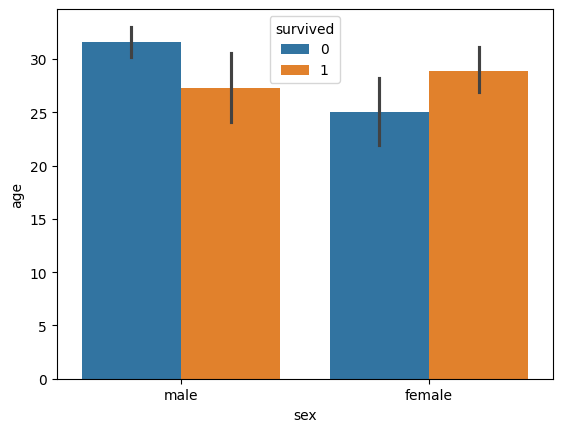

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.barplot(x='sex',y='age',data=titanic,hue='survived',estimator=np.mean)

plt.show()

In [ ]:
df = pd.DataFrame({'Sale ID': 'ab', 'Selling Price': 'mmb', 'Profit': 'clk'})

ValueError: If using all scalar values, you must pass an index

In [ ]:
fig = plt.figure(figsize=(10, 5))

In [ ]:
sub1 = fig.add_subplot(1, 2, 1)
sub2 = fig.add_subplot(1, 2, 2)